# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
#url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
#test_url = f'http://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}&units=imperial'
#response = requests.get(test_url).json()
#print(json.dumps(response, indent=4))



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_count = 0
total_cities = 1

city_name = []
lat = []
lng = []
max_temps = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'

    response = requests.get(url).json()
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        city_name.append('N/A')
        lat.append('N/A')
        lng.append('N/A')
        max_temps.append('N/A')
        humidity.append('N/A')
        cloudiness.append('N/A')
        wind_speed.append('N/A')
        country.append('N/A')
        date.append('N/A')

    print(f'#{total_cities}: {city}')
    total_cities += 1
    city_count += 1      

    if city_count > 49:
        time.sleep(60)
        city_count = 0



#1: beloha
#2: mgandu
#3: mys shmidta
#4: punta arenas
#5: mataura
#6: jamestown
#7: ambodifototra
#8: deputatskiy
#9: albany
#10: east london
#11: rungata
#12: kapaa
#13: yurty
#14: bombay
#15: belushya guba
#16: talnakh
#17: grand river south east
#18: busselton
#19: rikitea
#20: amderma
#21: barrow
#22: mount gambier
#23: bathsheba
#24: oussouye
#25: barentsburg
#26: campo grande
#27: laguna
#28: chhuikhadan
#29: ahipara
#30: cherskiy
#31: atuona
#32: ponta do sol
#33: sinop
#34: kamariotissa
#35: tautira
#36: marmora
#37: bambous virieux
#38: fort nelson
#39: gazli
#40: hobart
#41: saint george
#42: carnarvon
#43: puerto ayora
#44: dingle
#45: broken hill
#46: vila do maio
#47: alihe
#48: norden
#49: bhadrachalam
#50: hilo
#51: butaritari
#52: biltine
#53: vaini
#54: lompoc
#55: port elizabeth
#56: tingo maria
#57: srednekolymsk
#58: taolanaro
#59: bluff
#60: ushuaia
#61: new norfolk
#62: sao joao da barra
#63: geraldton
#64: castro
#65: tuktoyaktuk
#66: illoqqortoormiut
#67: qaana

In [6]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temps,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})
weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beloha,-25.1667,45.05,72.84,90,0,8.43,MG,1645494543
1,Mgandu,-5.95,34.1333,59.77,96,100,3.33,TZ,1645494596
2,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,Punta Arenas,-53.15,-70.9167,59.11,55,40,4.61,CL,1645494597
4,Mataura,-46.1927,168.864,50.65,98,100,6.87,NZ,1645494597
...,...,...,...,...,...,...,...,...,...
610,Karratha,-20.7377,116.846,92.57,45,68,9.28,AU,1645495523
611,Coos Bay,43.3665,-124.218,42.93,98,73,11.01,US,1645495261
612,Akot,21.0964,77.0586,70.41,24,0,2.53,IN,1645495523
613,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [7]:
missing_data = weather_df['City']== 'N/A'
#missing_data
missing_index = weather_df.loc[missing_data].index
#missing_index
fixed_df = weather_df.drop(missing_index)
fixed_df

fixed_df.to_csv('Weather Output/fixed_weather.csv')

In [15]:
#DONT RUN THIS CELL

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [8]:
fixed_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,556.0000,556.0000,556.00,556,556,556.00
unique,555.0000,553.0000,522.00,84,87,357.00
top,-39.0333,19.7667,63.23,93,100,4.61
freq,2.0000,2.0000,3.00,26,184,14.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
fixed_df.loc[fixed_df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#DONT RUN THIS CELL

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

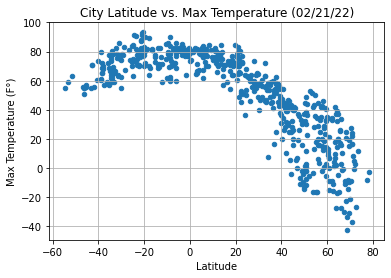

<Figure size 432x288 with 0 Axes>

In [32]:
fixed_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, title = 'City Latitude vs. Max Temperature (02/21/22)' )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F°)')
plt.show()
plt.savefig('Weather Output/lat_vs_temp_plot.png')

In [ ]:
#The code is graphing the latitude vs temperature scatter plot. There is a peak in the middle since temperature is the highest near the equator,
# or where latitude is 0.

## Latitude vs. Humidity Plot

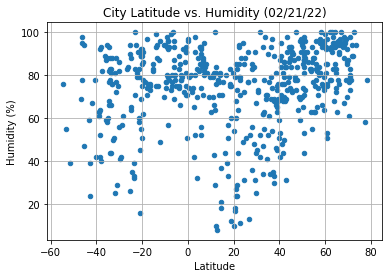

<Figure size 432x288 with 0 Axes>

In [33]:
fixed_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, title = 'City Latitude vs. Humidity (02/21/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig('Weather Output/lat_vs_humidity_plot.png')


In [ ]:
#The code is graphing the latitude vs humidity scatter plot. There does not seem to be a correlation.

## Latitude vs. Cloudiness Plot

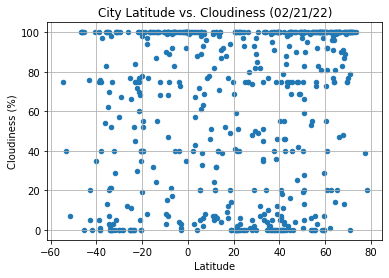

<Figure size 432x288 with 0 Axes>

In [34]:
fixed_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, title = 'City Latitude vs. Cloudiness (02/21/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig('Weather Output/city_vs_clouds_plot.png')


In [ ]:
#The code is graphing the latitude vs cloudiness scatter plot. There does not seem to be a correlation.

## Latitude vs. Wind Speed Plot

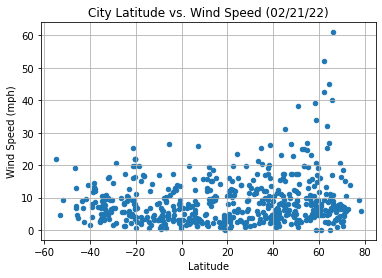

<Figure size 432x288 with 0 Axes>

In [35]:
fixed_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, title = 'City Latitude vs. Wind Speed (02/21/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig('Weather Output/city_vs_wind_plot.png')

In [ ]:
#The code is graphing the latitude vs wind speed scatter plot. The graph shows that wind speed does not exceed 30 mph in most cases.
#The peak on the right of the graph could be an outlier.

## Linear Regression

In [23]:
north_df = fixed_df.loc[fixed_df['Lat']>=0]
south_df = fixed_df.loc[fixed_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#A trend shown in the Max Temperature vs, Latitude linear regression graphs is that temperature decreases as latitude increases in
#the Northern hemisphere. In the Southern hemisphere, as the latitude decreases, the temperature also decreases.

The r-value is: 0.7320079590067021


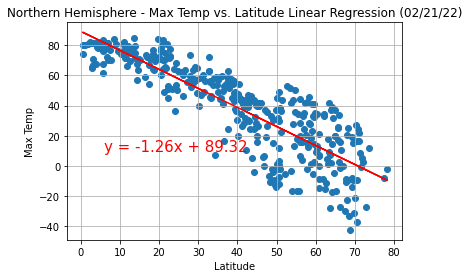

In [36]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/north_temp_vs_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2736939427261671


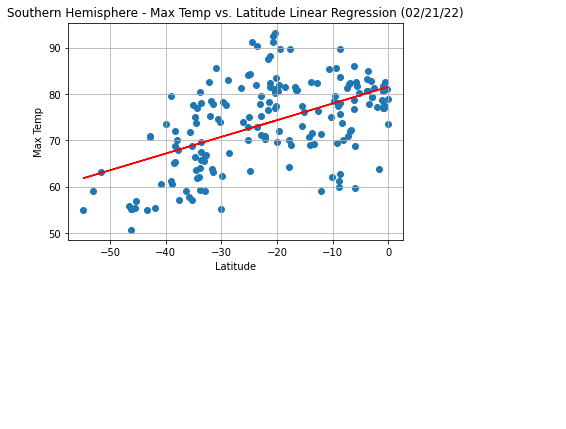

In [37]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/south_temp_vs_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#A trend show in the Humidity vs Latitude Linear Regression graphs is that humidity increases as latitude increases, for both hemispheres.

The r-value is: 0.11867766752024371


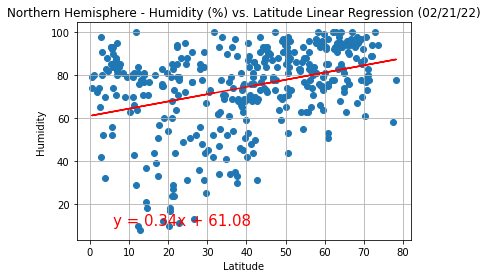

In [38]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/north_humidity_vs_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11571109665332116


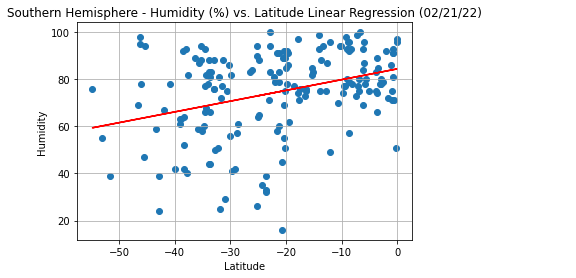

In [39]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/south_humidity_vs_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#A trend show in the Cloudiness vs Latitude Linear Regression graphs is that cloudiness increases as latitude increases, for both hemispheres.

The r-value is: 0.05119711446057183


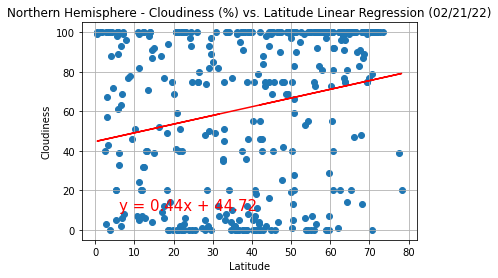

In [40]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/north_cloud_vs_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08660569424256151


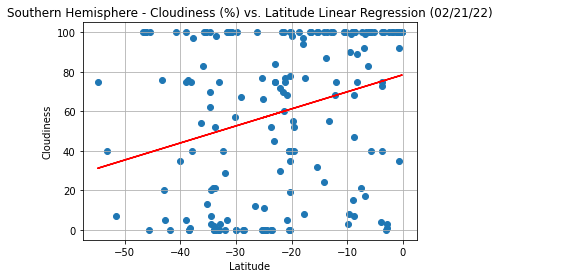

In [41]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/south_cloud_vs_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#A trend shown in the Wind Speed vs, Latitude linear regression graphs is that wind speed increases as latitude increases in
#the Northern hemisphere. In the Southern hemisphere, as the latitude decreases, the wind speed increases as well.

The r-value is: 0.03125762922006068


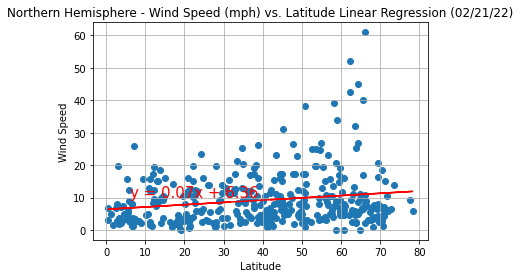

In [42]:
x_values = np.float64(north_df['Lat'])
y_values = np.float64(north_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/north_wind_vs_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01200759714806903


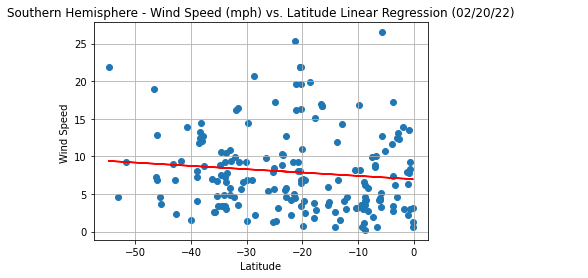

In [31]:
x_values = np.float64(south_df['Lat'])
y_values = np.float64(south_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ')
print(f"The r-value is: {rvalue**2}")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (02/21/22)')
plt.grid()
plt.savefig('Weather Output/south_wind_vs_lat.png')

In [ ]:
#DONT RUN THIS CELL